In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Display the first few rows and check the columns
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Select features (X) and target variable (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


Mean Squared Error (MSE): 0.56
R-squared: 0.58


Coefficients:
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


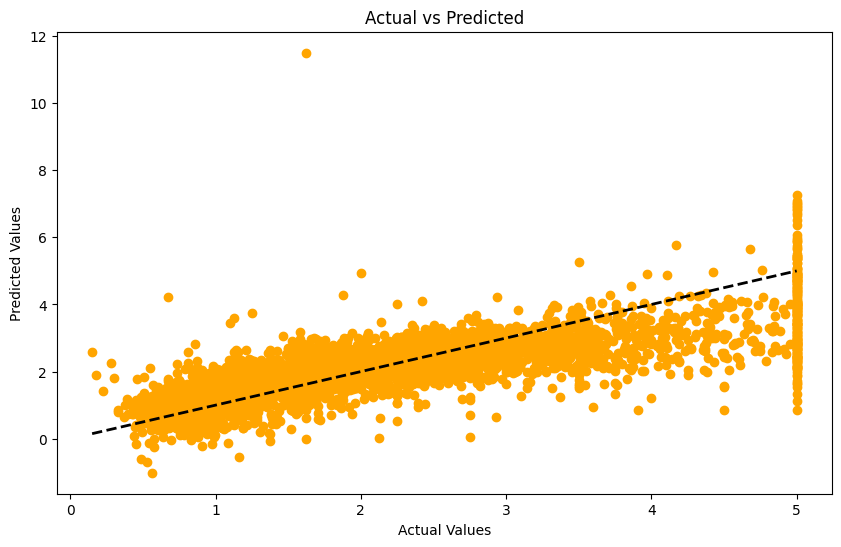

In [13]:
# Model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Coefficients:')
print(coefficients)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
